<a href="https://colab.research.google.com/github/288756/VisArtificial/blob/master/Prac06_Transforma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 6: Transformaciones**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

# Implementación

La transformación geométrica en imágenes es un campo fundamental en el procesamiento de imágenes y la visión por computador, abordando la modificación de la posición, orientación y escala de objetos en una imagen. Estas transformaciones, como traslación, rotación y escalado, son cruciales para corregir distorsiones, alinear imágenes, realinear objetos y simular perspectivas. Estas operaciones permiten adaptar la geometría de las imágenes, facilitando diversas aplicaciones, desde la corrección de imperfecciones hasta la manipulación creativa de contenidos visuales.

Para realizar transformaciones en un espacio 2D a menudo es conveniente trabajar con coordenadas homogéneas. Las coordenadas homogéneas son una extensión del sistema de coordenadas euclidiano que facilita ciertas operaciones matriciales, como las utilizadas en transformaciones geométricas.

> Implementa una función para convertir puntos 2D a coordenadas homogéneas. Como entrada se reciben un array de tamaño $2 \times N$, donde $N$ es el número de puntos. La salida es un array de tamaño $3 \times N$ añadiendo una fila de unos.

> Implementa una función para convertir coordenadas homogéneas a puntos 2D. Como entrada se reciben un array de tamaño $3 \times N$, donde $N$ es el número de puntos. La salida es un array de tamaño $2 \times N$ tras dividir las dos primeras filas entre la tercera.

> Añade tests usando `np.testing.assert_allclose` para verificar el correcto funcionamiento de las funciones.

> Define un conjunto de puntos y verifica su transformación. Utiliza como ejemplo el siguiente [demostrador](https://iis.uibk.ac.at/public/piater/courses/demos/homography/homography.xhtml)

In [2]:
import numpy as np

M = np.array([[1, 2, 4, 6], [3, 4, 4, 4]])
len(M)

def ahomogenea(M):
  num_columnas = M.shape[1]
  if len(M) != 2:
    raise ValueError
  else:
    fila1s = np.ones((1, num_columnas))
    M2 = np.vstack([M, fila1s])
    return M2

Mhom = ahomogenea(M)
Mhom

array([[1., 2., 4., 6.],
       [3., 4., 4., 4.],
       [1., 1., 1., 1.]])

In [3]:
def adosD(M):
    if M.shape[0] != 3:
        raise ValueError("El número de filas de M debe ser 3.")
    else:
        M_2D = M[:2] / M[2]# Se agrega [:, None] para mantener la forma correcta
        return M_2D

M2D = adosD(Mhom)
M2D

array([[1., 2., 4., 6.],
       [3., 4., 4., 4.]])

In [4]:
# Tests
def test_ahomogenea():
    M = np.array([[1, 2, 3], [4, 5, 6]])
    expected_hM= np.array([[1, 2, 3], [4, 5, 6], [1, 1, 1]])
    np.testing.assert_allclose(ahomogenea(M), expected_hM)

def test_adosD():
    M2 = np.array([[1, 2, 3], [4, 5, 6], [1, 1, 1]])
    expected_M2 = np.array([[1/3, 2/3, 1], [4/3, 5/3, 6]])
    np.testing.assert_allclose(adosD(M2), expected_M2)

# Ejecutar los tests
test_ahomogenea()
test_adosD()

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 5 / 6 (83.3%)
Max absolute difference: 3.33333333
Max relative difference: 2.
 x: array([[1., 2., 3.],
       [4., 5., 6.]])
 y: array([[0.333333, 0.666667, 1.      ],
       [1.333333, 1.666667, 6.      ]])

> Implementa una función que permita realizar la transformación geométrica de una imagen `def transform_image(img, matrix)` siguiendo los siguientes pasos:

> Crea un array con las coordenadas de los límites de la imagen (esquina superior izquierda, derecha, etc.).
>
> Convierte el array a coordenadas homogéneas, realiza la transformación usando la multiplicación de matrices, y determina los límites mínimos y máximos de las esquinas transformadas.
>
> Crea un array de puntos entre los punto mínimo y máximo en cada eje usando `np.linspace`. El número de elementos se puede recibir como parámetro a la función de transformación.
>
> Crea un grid usando `np.meshgrid`.
>
> Transforma las coordenadas del grid usando la transformación inversa.
>
> Para cada canal de la imagen, reinterpola la imagen en las coordenadas transformadas usando `scipy.ndimage.map_coordinates`. Esta función recibe las coordenadas en este orden: primero las filas y luego las columnas.
>
> La función debe retornar la imagen transformada y las dimensiones (`[xmin, xmax, ymax, ymin]`)
>
> Visualiza la imagen usando `imshow(warped, extent=extent)`



> Implementa ejemplos de traslaciones, rotaciones, proyecciones y combinaciones de estas.



In [5]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def transform_image(img, matrix, npuntos=100):
    alto, ancho = img.shape[:2]

    # Coordenadas de los límites de la imagen
    limites = np.array([[0, ancho-1, ancho-1, 0], [0, 0, alto-1, alto-1]])

    # Convertir a coordenadas homogéneas
    limites_homogeneos = ahomogenea(limites)

    # Aplicar transformación usando multiplicación de matrices
    limites_transformados = matrix @ limites_homogeneos

    # Determinar los límites mínimos y máximos de las esquinas transformadas
    xmin, xmax = np.min(limites_transformados[0]), np.max(limites_transformados[0])
    ymin, ymax = np.min(limites_transformados[1]), np.max(limites_transformados[1])

    # Crear un array de puntos entre los límites mínimo y máximo en cada eje
    xval = np.linspace(xmin, xmax, npuntos)
    yval = np.linspace(ymin, ymax, npuntos)

    # Crear un grid
    X, Y = np.meshgrid(xval, yval)

    # Transformar las coordenadas del grid usando la transformación inversa
    inv_matrix = np.linalg.inv(matrix)
    inv_transformada = inv_matrix @ ahomogenea(np.vstack((X.flatten(), Y.flatten())))

    # Redimensionar las coordenadas transformadas para que tengan la misma forma que el grid
    X_transformada = inv_transformada[0].reshape(X.shape)
    Y_transformada = inv_transformada[1].reshape(Y.shape)

    # Reinterpolar la imagen en las coordenadas transformadas
    channels = [ndimage.map_coordinates(img[:,:,i], [Y_transformada, X_transformada], order=1, mode='nearest').reshape(X.shape) for i in range(img.shape[2])]
    warped_img = np.stack(channels, axis=2)

    # Definir las dimensiones del resultado
    extent = [xmin, xmax, ymax, ymin]

    # Visualizar la imagen
    plt.imshow(warped_img, extent=extent)
    plt.show()

    return warped_img, extent




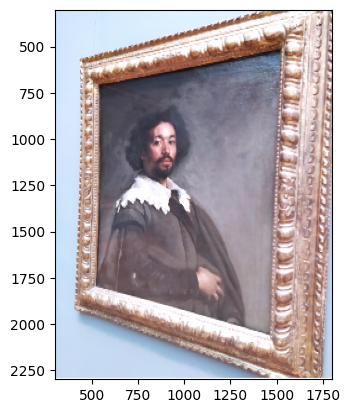

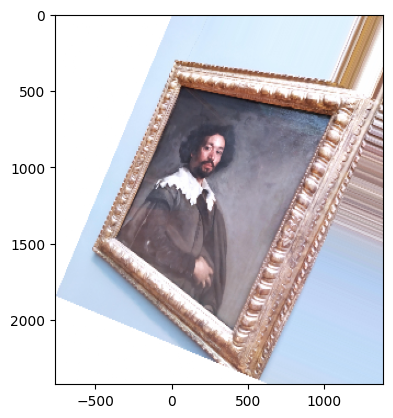

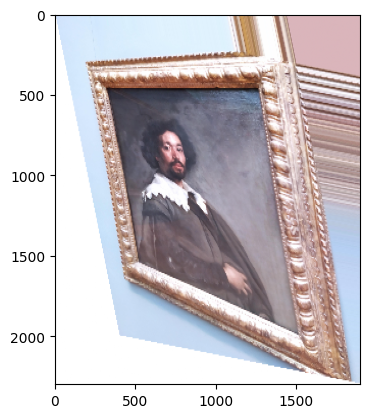

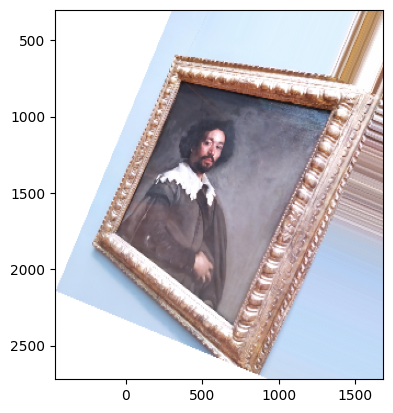

(array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.76694958, 0.62185155, 0.50812606],
         [0.70261324, 0.57254902, 0.47777892],
         [0.84669071, 0.73875554, 0.68572233]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.74946549, 0.60549933, 0.50074886],
         [0.73279638, 0.61826547, 0.54660334],
         [0.8223616 , 0.72991279, 0.68343787]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.70436649, 0.57254902, 0.47602567],
         [0.83967772, 0.7299893 , 0.67520285],
         [0.83407629, 0.73867379, 0.70858609]],
 
        ...,
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.     

In [9]:
# Traslación
translation_matrix = np.array([[1, 0, 300],
                               [0, 1, 300],
                               [0, 0, 1]])

# Rotación
theta = np.pi / 8  # 45 grados
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                            [np.sin(theta), np.cos(theta), 0],
                            [0, 0, 1]])

# Proyección
projection_matrix = np.array([[1, 0.2, 0],
                               [0.2, 1, 0],
                               [0, 0, 1]])

# Combinación de traslación y rotación
combined_matrix = translation_matrix @ rotation_matrix


# Aplicar las transformaciones a la imagen
transform_image(img, translation_matrix, 300)
transform_image(img, rotation_matrix, 300)
transform_image(img, projection_matrix, 300)
transform_image(img, combined_matrix, 300)

# Estimación

La estimación de una transformación se realiza comúnmente utilizando métodos de mínimos cuadrados para minimizar la diferencia entre las coordenadas transformadas y las coordenadas reales de los puntos correspondientes.

Como ejemplo, se va a estimar una transformación para obtener una imagen frontal de un cuadro.

In [7]:
!curl http://www.atc.uniovi.es/grado/3va/prac/pareja.png -o pareja.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2862k  100 2862k    0     0  2190k      0  0:00:01  0:00:01 --:--:-- 2191k


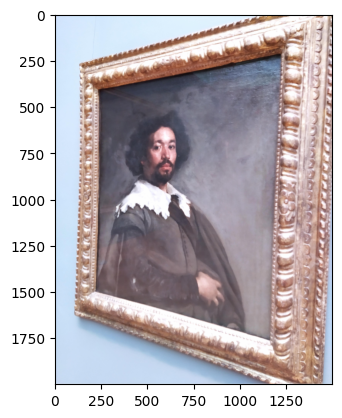

In [8]:
import skimage.io
from skimage import img_as_float
img = skimage.io.imread("pareja.png")
img = img_as_float(img)
plt.imshow(img)
plt.show()

En este caso, se proporcionan las coordenadas en la imagen en píxeles y las de destino en milímetros.

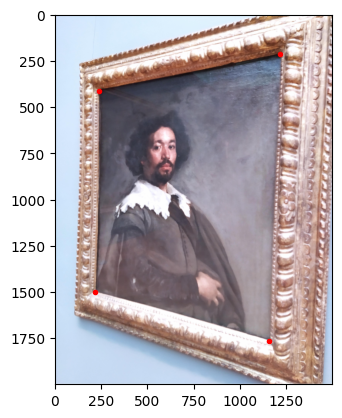

In [10]:
src = np.array(
    [
        [ 240,  218, 1219, 1159],
        [ 410, 1498,  212, 1765]
    ]
)
W = 699
H = 813
dst = np.array(
    [
        [  0,   0, 699, 699],
        [  0, 813,   0, 813]
    ]
)
plt.imshow(img)
plt.plot(src[0,:], src[1,:], '.r')
plt.show()

Para estimar la transformación, dados los puntos en la imagen $(x_i, y_i)$ y sus correspondencias en coordenadas del mundo $(x_i', y_i')$. Se debe resolver el sistema de ecuaciones:

$$
\begin{bmatrix}
    0 & 0 & 0 & -w_1 x_1 & -w_1 y_1 & -w_1 \\
    w_1 x_1 & w_1 y_1 & w_1 & 0 & 0 & 0 \\
    -y'_1 x_1 & -y'_1 y_1 & -y'_1 & x'_1 x_1 & x'_1 y_1 & x'_1 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & -w_n x_n & -w_n y_n & -w_n \\
    w_n x_n & w_n y_n & w_n & 0 & 0 & 0 \\
    -y'_n x_n & -y'_n y_n & -y'_n & x'_n x_n & x'_n y_n & x'_n \\
\end{bmatrix}
\begin{bmatrix}
    h_{11} \\
    h_{12} \\
    h_{13} \\
    h_{21} \\
    h_{22} \\
    h_{23} \\
    h_{31} \\
    h_{32} \\
    h_{33}
\end{bmatrix} = \mathbf{0}
$$

> Para estimar la transformación se deben seguir los siguientes pasos:
>
> Construye la matriz de coeficientes tal y como se muestra en la ecuación anterior usando todos los puntos disponibles.
>
> Utiliza la función `scipy.linalg.svd` para obtener la descomposición de valores singulares de la matriz de coeficientes. La solución es la última fila de $V$: `V[-1, :].reshape(3, 3)`.
>
> Transforma la imagen usando el resultado anterior y verifica el resultado.
>
> Estima la transformación usando `skimage.transform.estimate_transform` y verifica que proporciona los mismos resultados.

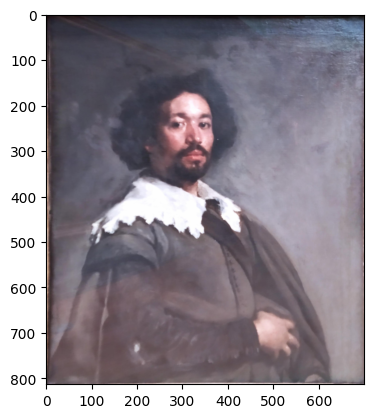

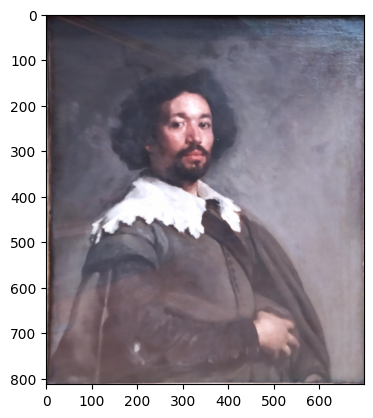

In [11]:
from scipy.linalg import svd
from skimage.transform import warp
import matplotlib.pyplot as plt

# Construir la matriz de coeficientes
A = np.zeros((src.shape[1] * 2, 9))
for i in range(src.shape[1]):
    x, y = src[0, i], src[1, i]
    xp, yp = dst[0, i], dst[1, i]
    A[i * 2, :] = [x, y, 1, 0, 0, 0, -xp * x, -xp * y, -xp]
    A[i * 2 + 1, :] = [0, 0, 0, x, y, 1, -yp * x, -yp * y, -yp]

# Resolver el sistema de ecuaciones utilizando SVD
_, _, V = svd(A)
H_estimated = V[-1, :].reshape(3, 3)

# Transformar la imagen usando la matriz de homografía estimada con warp de scikit-image
warped_img = warp(img, np.linalg.inv(H_estimated), output_shape=(H, W))

# Mostrar el resultado
plt.imshow(warped_img, extent=[0, W, H, 0])
plt.show()

from skimage.transform import estimate_transform

# Estimar la transformación usando skimage.transform.estimate_transform
transform_skimage = estimate_transform('projective', src.T, dst.T)

# Aplicar la transformación estimada a la imagen de entrada
warped_img_skimage = warp(img, transform_skimage.inverse, output_shape=(H, W))

# Mostrar el resultado obtenido con skimage
plt.imshow(warped_img_skimage)
plt.show()
